---

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>

---


# Finance Data Project

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

---

** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **

---

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.


## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

_Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture._

### The Imports

Already filled out for you.


In [26]:
%pip install pandas
%pip install numpy
%pip install datetime
%pip install pandas-datareader
%pip install matplotlib
%pip install seaborn
%pip install cufflinks
%pip install plotly
%pip install yfinance
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     --------------- ------------------------ 30.7/81.7 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 81.7/81.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for ipywidgets>=7.0.0 from https://files.pythonhosted.org/packages/4a/0e/57ed498fafbc60419a9332d872e929879ceba2d73cb11d284d7112472b3e/ipywidgets-8.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for widgetsnbextension~

In [51]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import seaborn as sns
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:

- Bank of America
- CitiGroup
- Goldman Sachs
- JPMorgan Chase
- Morgan Stanley
- Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**

1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
3. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**

    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK.

---

### We also provide pickle file in the article lecture right before the video lectures.


In [39]:
start = dt.datetime(2006, 1, 1)
end = dt.datetime(2016, 1, 1)


I ran into some issues with the datareader and the APIs available in that library. I decided to pivot to yfinance to still demonstrate that I can pull data from an API and use it in a project.

This means that some of the data will likely be different because of the source information and or any calculations derived from that data.

In [37]:
BAC = yf.Ticker('BAC')
BAC_history = BAC.history(start=start, end=end)

C = yf.Ticker('C')
C_history = C.history(start=start, end=end)

GS = yf.Ticker('GS')
GS_history = GS.history(start=start, end=end)

JPM = yf.Ticker('JPM')
JPM_history = JPM.history(start=start, end=end)

MS = yf.Ticker('MS')
MS_history = MS.history(start=start, end=end)

WFC = yf.Ticker('WFC')
WFC_history = WFC.history(start=start, end=end)

** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**


In [40]:
tickers = ['BAC','C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**


In [41]:
bank_stocks = pd.concat([BAC_history, C_history, GS_history, JPM_history, MS_history, WFC_history], axis=1, keys=tickers)

** Set the column name levels (this is filled out for you):**


In [42]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**


In [43]:
bank_stocks.head()

Bank Ticker                      BAC                                   \
Stock Info                      Open       High        Low      Close   
Date                                                                    
2006-01-03 00:00:00-05:00  32.315246  32.494318  31.784926  32.425446   
2006-01-04 00:00:00-05:00  32.370359  32.535655  31.991557  32.081093   
2006-01-05 00:00:00-05:00  32.081088  32.253270  31.902016  32.122410   
2006-01-06 00:00:00-05:00  32.232615  32.308376  31.922686  32.074207   
2006-01-09 00:00:00-05:00  32.177498  32.349681  31.929555  32.094849   

Bank Ticker                                                          C  \
Stock Info                   Volume Dividends Stock Splits        Open   
Date                                                                     
2006-01-03 00:00:00-05:00  16296700       0.0          0.0  340.780170   
2006-01-04 00:00:00-05:00  17757900       0.0          0.0  339.806529   
2006-01-05 00:00:00-05:00  14970700       0.0          0.0  336.885471   
2006-01-06 00:00:00-05:00  12599800       0.0          0.0  339.945533   
2006-01-09 00:00:00-05:00  15619400       0.0          0.0  337.998241   

Bank Ticker                                        ...       MS            \
Stock Info                       High         Low  ...   Volume Dividends   
Date                                               ...                      
2006-01-03 00:00:00-05:00  343.422946  334.590493  ...  5377000       0.0   
2006-01-04 00:00:00-05:00  341.475652  336.259629  ...  7977800       0.0   
2006-01-05 00:00:00-05:00  339.250063  336.607287  ...  5778000       0.0   
2006-01-06 00:00:00-05:00  340.084635  335.216348  ...  6889800       0.0   
2006-01-09 00:00:00-05:00  338.971894  335.911832  ...  4144500       0.0   

Bank Ticker                                   WFC                        \
Stock Info                Stock Splits       Open       High        Low   
Date                                                                      
2006-01-03 00:00:00-05:00          0.0  19.358486  19.588215  19.110379   
2006-01-04 00:00:00-05:00          0.0  19.481011  19.493263  19.214526   
2006-01-05 00:00:00-05:00          0.0  19.297225  19.330919  19.180829   
2006-01-06 00:00:00-05:00          0.0  19.346236  19.465695  19.226777   
2006-01-09 00:00:00-05:00          0.0  19.404432  19.496325  19.330920   

Bank Ticker                                                            
Stock Info                     Close    Volume Dividends Stock Splits  
Date                                                                   
2006-01-03 00:00:00-05:00  19.542269  11016400       0.0          0.0  
2006-01-04 00:00:00-05:00  19.315607  10870000       0.0          0.0  
2006-01-05 00:00:00-05:00  19.294163  10158000       0.0          0.0  
2006-01-06 00:00:00-05:00  19.407497   8403800       0.0          0.0  
2006-01-09 00:00:00-05:00  19.404432   5619600       0.0          0.0  

[5 rows x 42 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**


In [44]:
bank_stocks.xs(
    key='Close',
    axis=1,
    level='Stock Info'
    ).max()

Bank Ticker
BAC     39.213406
C      408.687195
GS     193.101395
JPM     55.916588
MS      53.292389
WFC     46.069557
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$


In [46]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**


In [49]:
for stock in tickers:
    returns[stock + ' Return'] = bank_stocks[stock]['Close'].pct_change()
    
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00-05:00,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05 00:00:00-05:00,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06 00:00:00-05:00,-0.001501,0.000000,0.014169,0.007045,0.001026,0.005874
2006-01-09 00:00:00-05:00,0.000644,-0.004731,0.012031,0.016242,0.010585,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**


c:\Users\jefbl\myDevEnv\2023UdemyPythonForDataScienceAndML\05-Data-Visualization-with-Matplotlib\.conda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


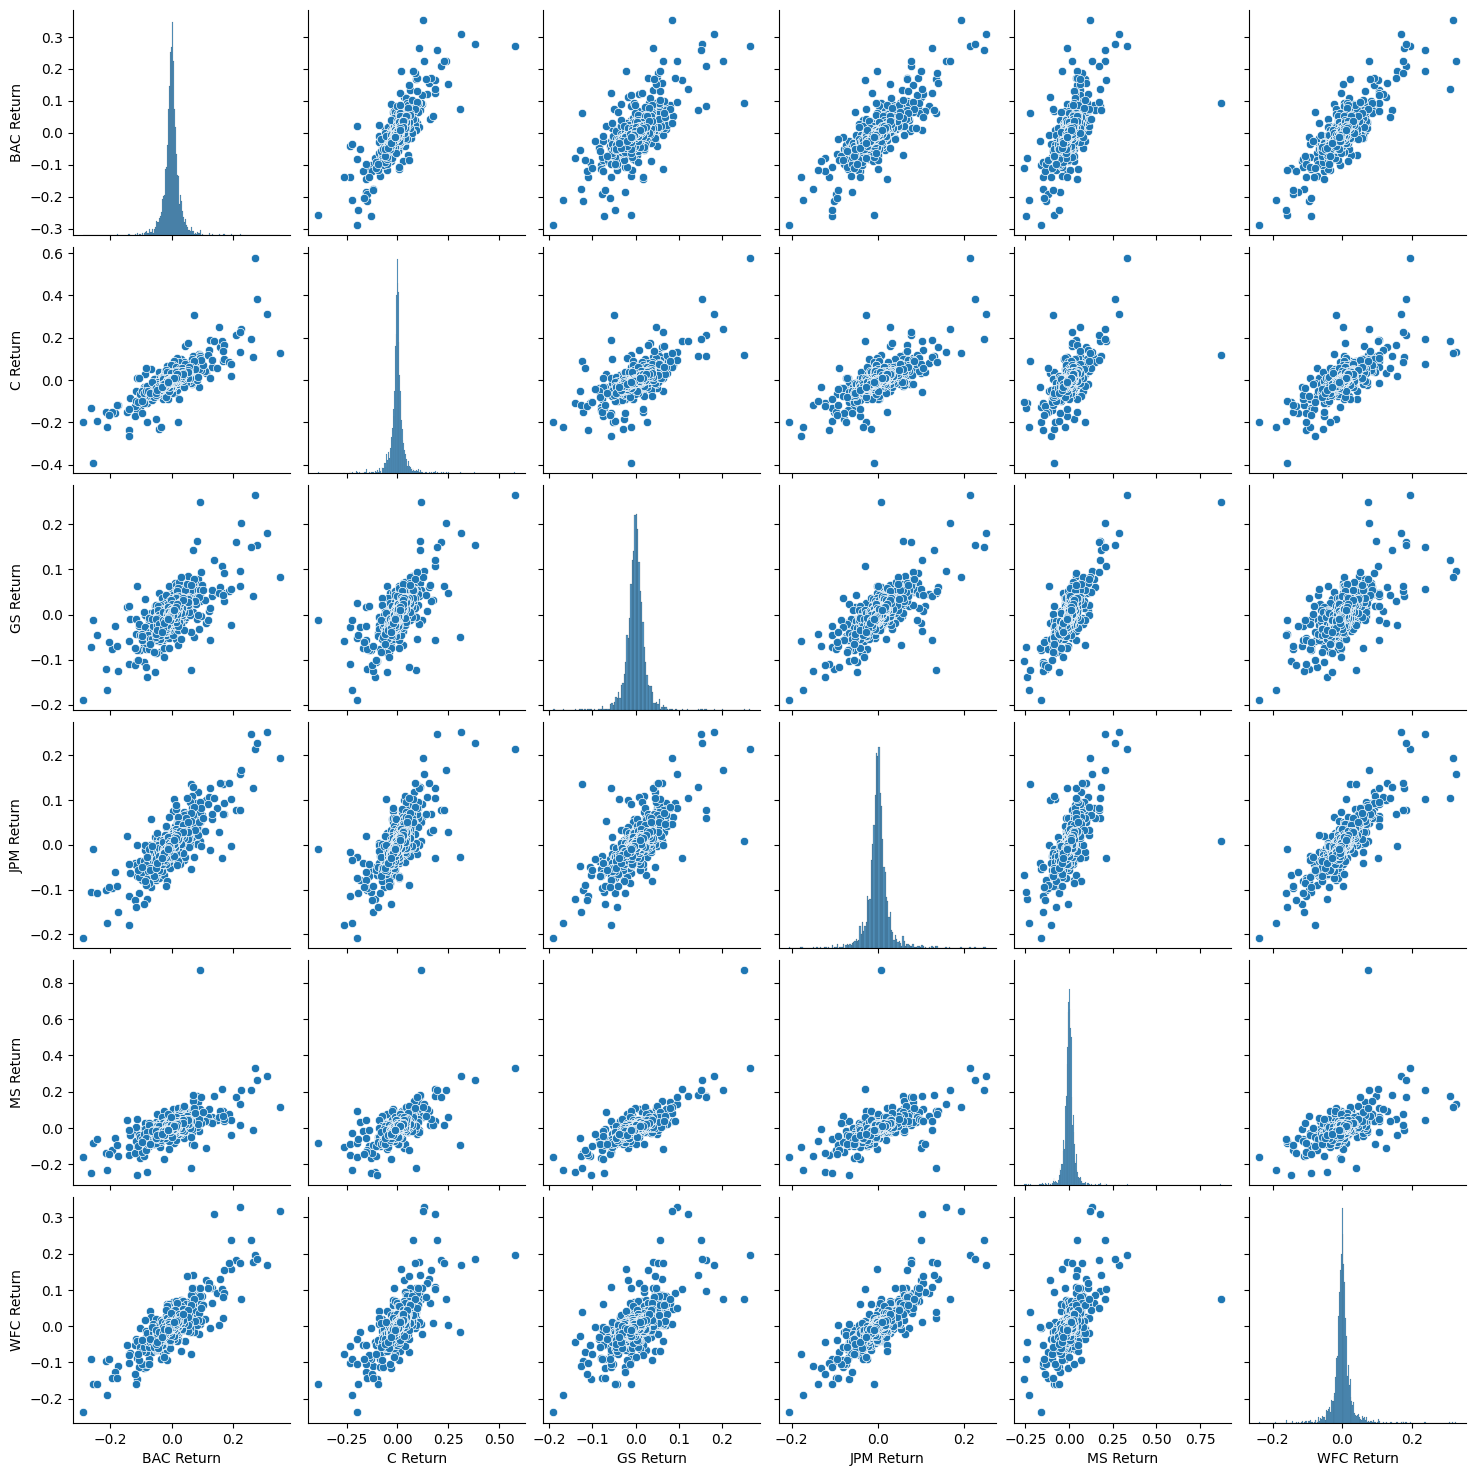

In [55]:
# The first rown of returns is all NAN values, so we need to drop it
sns.pairplot(returns[1:])

<Axes: xlabel='Date', ylabel='Closing Price'>

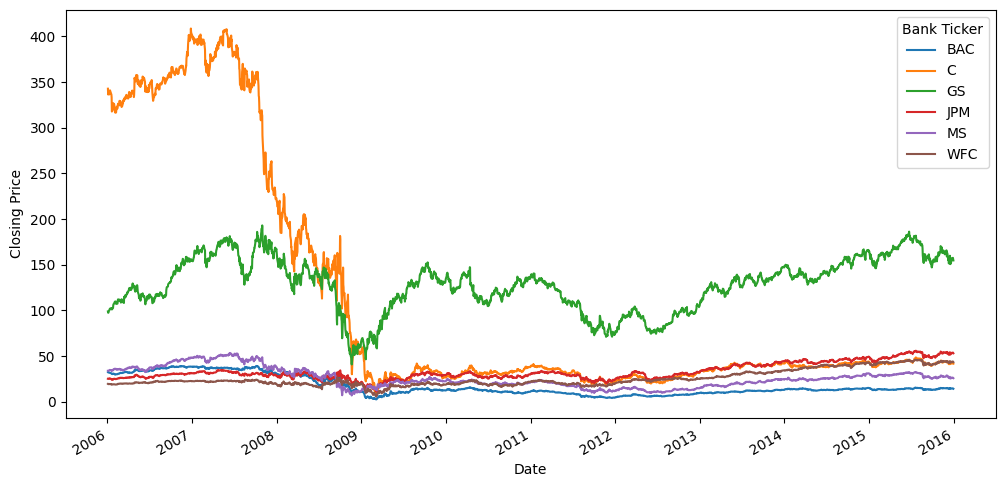

In [61]:
bank_stocks.xs(
    key='Close',
    axis=1,
    level='Stock Info'
    ).plot(
        label='Citigroup',
        xlabel='Date',
        ylabel='Closing Price',
        figsize=(12,6)
        )

Looks like citigroup continuted to crash in 2009. This is important because this came at a time when the rest of the banks were recovering from the 2008 crash or at least holding steady according to the data.

- See solution for details about Citigroup behavior....


** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**


In [72]:
returns.idxmin().apply(lambda x: x.strftime('%Y-%m-%d'))


BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2009-01-20
dtype: object

In [73]:
returns.idxmax().apply(lambda x: x.strftime('%Y-%m-%d'))

BAC Return    2009-04-09
C Return      2008-11-24
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: object

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **


- See Solution for details


** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**


<Axes: >

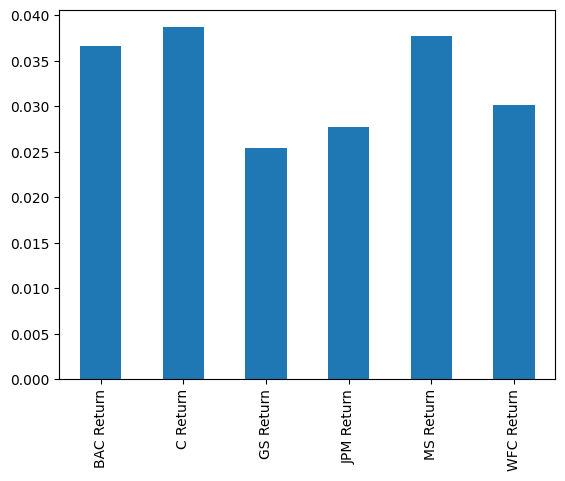

In [77]:
returns.std().plot(kind='bar')

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **


c:\Users\jefbl\myDevEnv\2023UdemyPythonForDataScienceAndML\05-Data-Visualization-with-Matplotlib\.conda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


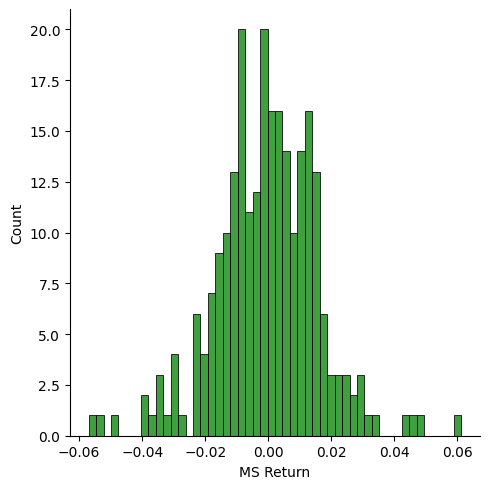

In [78]:
sns.displot(returns['2015-01-01':'2015-12-31']['MS Return'], bins=50, color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **


c:\Users\jefbl\myDevEnv\2023UdemyPythonForDataScienceAndML\05-Data-Visualization-with-Matplotlib\.conda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


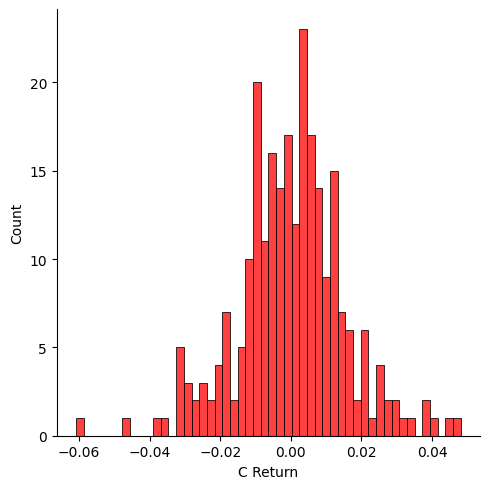

In [83]:
sns.displot(returns['2015-01-01':'2015-12-31']['C Return'], bins=50, color='red')

---

# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports


In [84]:
%pip install cufflinks
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Note: you may need to restart the kernel to use updated packages.


** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**


<Axes: xlabel='Date', ylabel='Closing Price'>

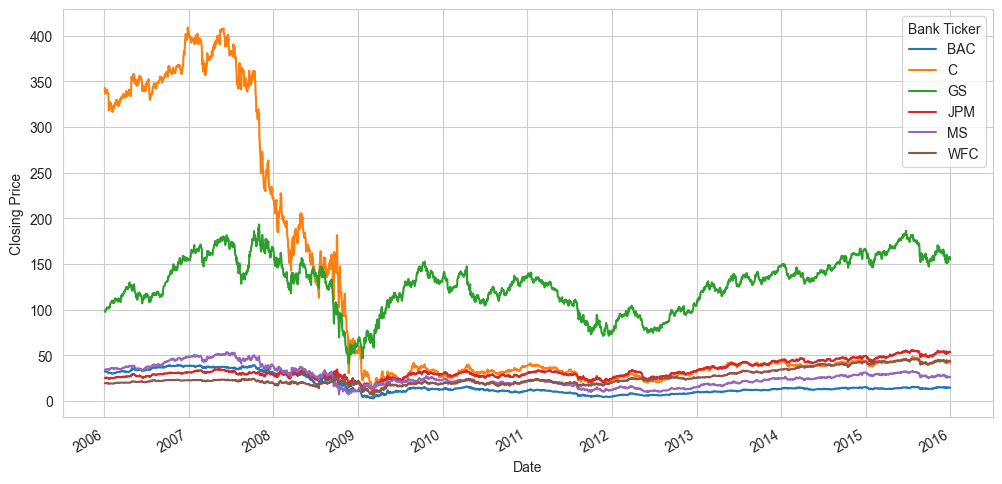

In [85]:
bank_stocks.xs(
    key='Close',
    axis=1,
    level='Stock Info'
    ).plot(
        label='Citigroup',
        xlabel='Date',
        ylabel='Closing Price',
        figsize=(12,6)
        )

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008.

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**


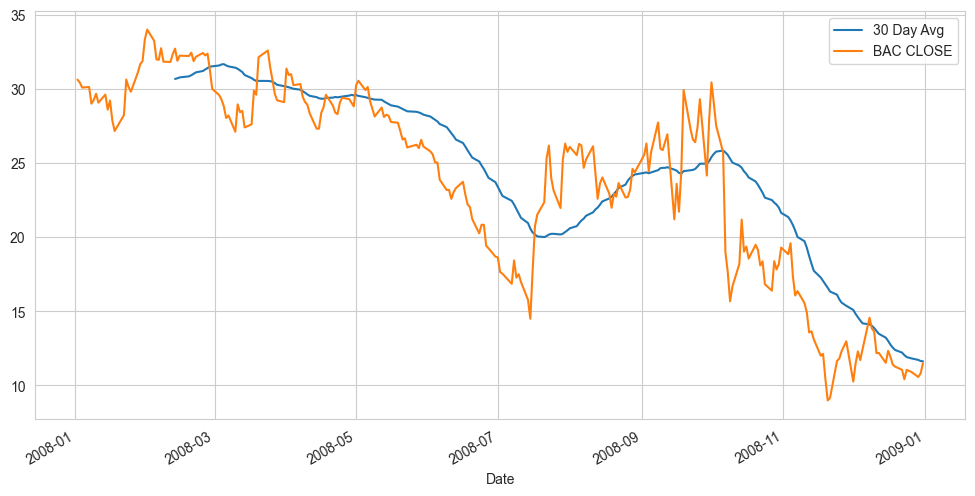

In [94]:
plt.figure(figsize=(12,6))
bank_stocks['BAC']['Close']['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Avg') 
bank_stocks['BAC']['Close']['2008-01-01':'2008-12-31'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

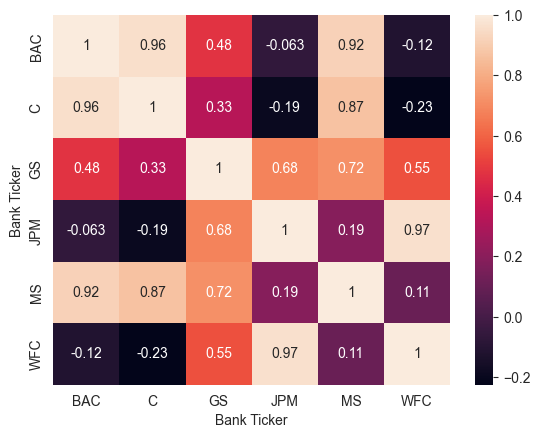

In [95]:
sns.heatmap(bank_stocks.xs(key="Close", axis=1, level="Stock Info").corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**


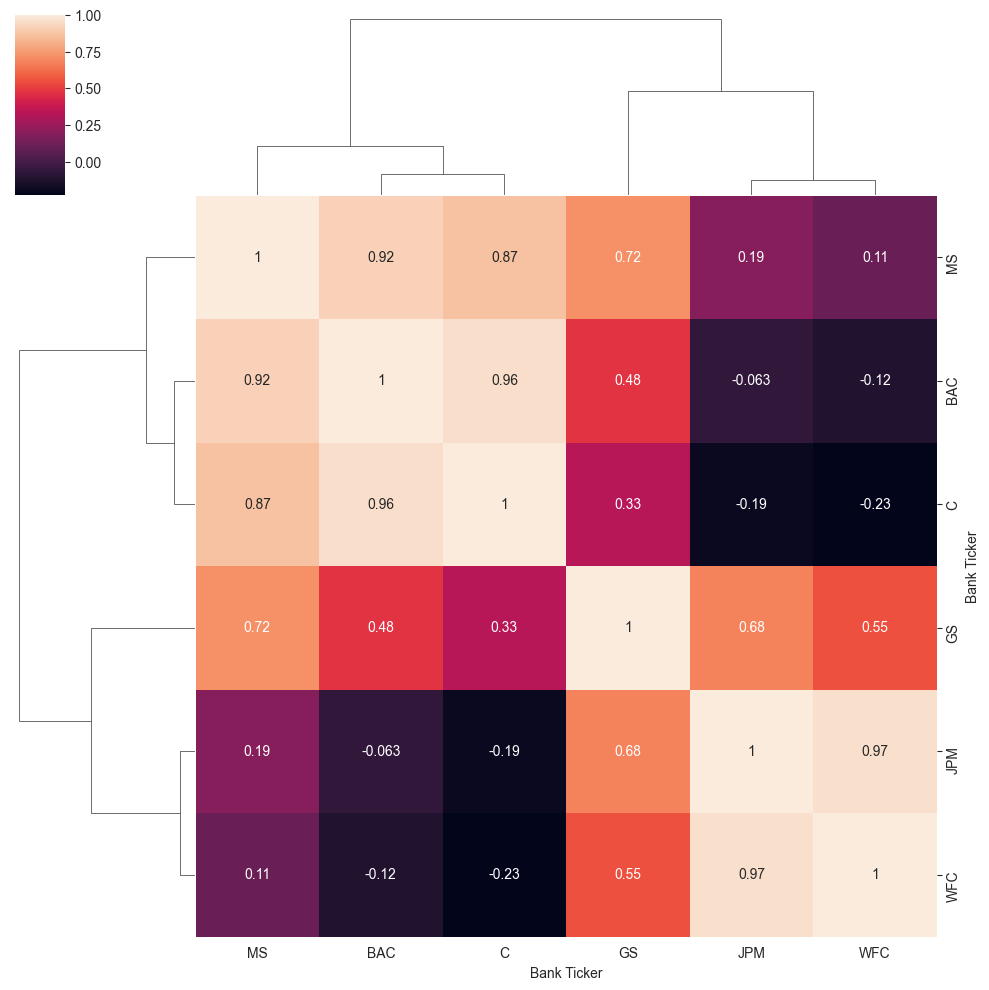

In [96]:
sns.clustermap(bank_stocks.xs(key="Close", axis=1, level="Stock Info").corr(), annot=True)